In [7]:
import pandas as pd # Import the pandas library for data manipulation and analysis
import numpy as np # Import the numpy library for numerical operations

from sklearn.model_selection import train_test_split # Import train_test_split for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature scaling
from sklearn.pipeline import Pipeline # Import Pipeline to streamline workflow by chaining multiple estimators
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier for building the classification model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score # Import various metrics for model evaluation
import matplotlib.pyplot as plt # Import matplotlib.pyplot for plotting and visualization

In [8]:
from google.colab import files # Import the files module from google.colab to handle file uploads
upl = files.upload() # Prompt for file upload and store the upload information
fname = list(upl.keys())[0] # Get the name of the uploaded file

df = pd.read_excel(fname)  # Read the uploaded Excel file into a pandas DataFrame
df.head() # Display the first 5 rows of the DataFrame to inspect the data

Saving RF_ProjectProgress_CombinedDatasets_Subsets.xlsx to RF_ProjectProgress_CombinedDatasets_Subsets (1).xlsx


,freq1,noise,max_magnitude,total_gain_db,base_pwr_db,rssi,relpwr_db,avgpwr_db,Output,Source file
0,5805,-108,60,87,380,7,8,56,0,5ghz_activescan_background_loc1_1.csv
1,5805,-108,48,87,380,5,10,55,0,5ghz_activescan_background_loc1_1.csv
2,5805,-108,54,87,380,5,8,55,0,5ghz_activescan_background_loc1_1.csv
3,5805,-108,52,87,380,7,9,55,0,5ghz_activescan_background_loc1_1.csv
4,5805,-108,48,87,380,5,11,56,0,5ghz_activescan_background_loc1_1.csv


In [9]:
cols = [ # Define a list of column names to be used as features (independent variables)
    "freq1", "noise", "max_magnitude", "total_gain_db",
    "base_pwr_db", "rssi", "relpwr_db", "avgpwr_db"
]

X = df[cols] # Create the feature matrix X by selecting the specified columns from the DataFrame
y = df["Output"] # Create the target vector y by selecting the 'Output' column from the DataFrame

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split( # Split the data into training and testing sets
    X, y, # Input features X and target variable y
    test_size = 0.2, # Allocate 20% of the data for testing
    stratify = y, # Ensure that the proportion of target variable classes is the same in both train and test sets
    random_state = 42 # Set a random seed for reproducibility of the split
)

rf = Pipeline([ # Create a machine learning pipeline named 'rf'
    ("scaler", StandardScaler()), # Step 1: Standardize features
    ("model", RandomForestClassifier( # Step 2: Apply the Random Forest Classifier model
        n_estimators = 300, # Use 300 decision trees in the forest
        max_depth = None, # Allow trees to expand until all leaves are pure or contain less than min_samples_split samples
        random_state = 42 # Set a random seed for reproducibility of the model training
    ))
])

rf.fit(Xtrain, ytrain) # Train the pipeline  using the training data

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

Accuracy: 0.9825
Precision: [0.97073171 0.99487179]
Recall: [0.995 0.97 ]
F1: [0.98271605 0.98227848]

Classification report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       200
           1       0.99      0.97      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



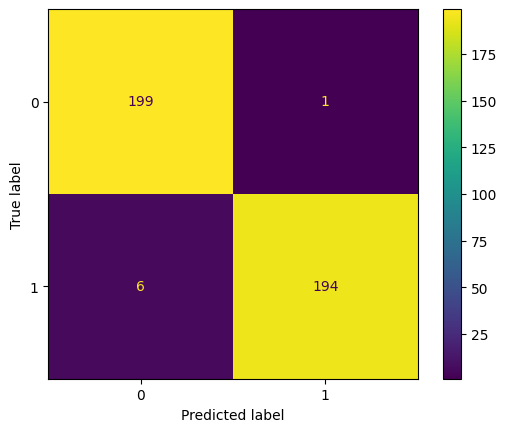

In [11]:
pred = rf.predict(Xtest) # Make predictions on the test set using the trained pipeline

avg = 'binary' if len(np.unique(ytest)) == 2 else 'macro' # Determine averaging method for metrics: 'binary' for binary classification, 'macro' for multi-class
print("Accuracy:", accuracy_score(ytest, pred)) # Print the overall accuracy of the model
print("Precision:", precision_score(ytest, pred, average=None if avg=='binary' else avg)) # Print precision score
print("Recall:", recall_score(ytest, pred, average=None if avg=='binary' else avg)) # Print recall score
print("F1:", f1_score(ytest, pred, average=None if avg=='binary' else avg)) # Print F1 score
print("\nClassification report\n") # Print a header for the classification report
print(classification_report(ytest, pred)) # Print a detailed classification report including precision, recall, f1-score, and support for each class

cm = confusion_matrix(ytest, pred) # Compute the confusion matrix to evaluate the accuracy of a classification
ConfusionMatrixDisplay(cm).plot() # Plot the confusion matrix
plt.show() # Display the plot

In [12]:
model = rf.named_steps["model"] # Extract the trained RandomForestClassifier model from the pipeline
imp = model.feature_importances_ # Get the feature importances from the trained model

for name, val in zip(cols, imp): # Iterate through feature names and their corresponding importances
    print(name, ":", round(val, 4)) # Print each feature's name and its importance, rounded to 4 decimal places

freq1 : 0.027
noise : 0.0584
max_magnitude : 0.082
total_gain_db : 0.1779
base_pwr_db : 0.155
rssi : 0.3295
relpwr_db : 0.0791
avgpwr_db : 0.0911
